Breadth-First Search


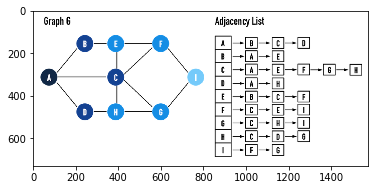

In [6]:
from PIL import Image #Python Image Library
import matplotlib.pyplot as plt 
img = Image.open("D:/BFS.png")
print("Breadth-First Search")
plt.imshow(img,)
plt.show()

In [3]:
print("  B--E--F")
print(" /   | / \ ")
print("A ---C    I")
print(" \   | \ /")
print("  D--H--G")
print()
print("A-> B -> C -> D")
print("B-> A -> E")
print("C-> A -> E -> F -> G -> H")
print("D-> A -> H")
print("E-> B -> C -> F")
print("F-> C -> E -> I")
print("G-> C -> H -> I")
print("H-> C -> D -> G")
print("I-> F -> G")
print()
print("State 1: B C F A G H I D")
print("State 2: E B C F A G H I D")


  B--E--F
 /   | / \ 
A ---C    I
 \   | \ /
  D--H--G

A-> B -> C -> D
B-> A -> E
C-> A -> E -> F -> G -> H
D-> A -> H
E-> B -> C -> F
F-> C -> E -> I
G-> C -> H -> I
H-> C -> D -> G
I-> F -> G

State 1: B C F A G H I D
State 2: E B C F A G H I D


BFS排序流程:(Queue)(先進先出)
---
-    1.首先先決定起始點
-    2.做一個表有關每個點以及相連的點
-    3.再根據這個表做出從起始點走訪的順序
<br>   
-    4.從起始點開始依序放入起始點以及與起始點相連的點
-    5.與起始點相連的點都走訪過後，將起始點的下一項為新的起始點
-    6.重複第4步驟直到所有點都走訪過一次結束走訪流程

DFS排序流程:(Stack)(後進先出)
---

-    1.首先先決定起始點
-    2.做一個表有關每個點以及相連的點
-    3.再根據這個表做出從起始點走訪的順序
<br> 
-    4.從起始點開始依序放入起始點以及與起始點相連的點
-    5.與起始點相連的點都走訪過後，與起始點相連且最後放入的點為新的起始點
-    6.重複第4步驟直到所有點都走訪過一次結束走訪流程

BFS，DFS比較:
---
<br>    BFS是以Queue(先進先出)的方法，DFS則是用Stack(後進先出)，在排序上就會有不同的走訪順序
<br>
<br>    BFS是將所有的點走訪過一次，走過的點就放進去，直到所有的點都走訪過
<br>    先走過的點就會先放入搜尋順序
<br>
<br>    DFS一樣是將所有的點走訪過，走過的點就放進去，直到所有的點都走訪過
<br>    將最後得到的點先取出並放入搜尋順序

In [66]:
#http://design2u.me/blog/33/python-list-%E4%B8%B2%E5%88%97-%E8%88%87-dictionary-%E5%AD%97%E5%85%B8-%E5%9F%BA%E6%9C%AC%E6%8C%87%E4%BB%A4
#了解dictionary的操作，取資料

D = {0: [1, 2], 1: [2], 2: [0, 3], 3: [3], 4: [7]}
print(D.values())
print(D[2])

dict_values([[1, 2], [2], [0, 3], [3], [7]])
[0, 3]


In [67]:
#取全部的點數量
print(D.keys())
print(len(D.keys()))

dict_keys([0, 1, 2, 3, 4])
5


In [ ]:
BFS 方法:
    1.創建state 1 和 state 2 
    2.將起始點放到state 2 
    3.起始點剩下連接的點放到state 1
    4.從state 1的第一項開始放到state 2
    5.把state 1的第一項接續放到state 1 
    6.如果state 1 和 state 2 都有存在要加入的點，就跳過不加
    7.等到所有state 1 的連接點都跑過一次後，換在state 1 的下一個點
    8.重複2~7步驟

In [1]:
#參考資料:自己思考步驟並轉換為程式碼
#pair programming 討論

from collections import defaultdict 
class Graph:
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph 
        self.graph = defaultdict(list) 
    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
        return
    def max_length(self):
        return len(self.graph.keys())
    def print_dict(self):
        return self.graph
    # Function to print a BFS of graph 
    def BFS(self, s): 
        state_1 = []
        state_2 = []
        state_2.append(s)
        index = 0
        while len(state_2) != self.max_length():
            for i in self.graph[s]:
                if state_1.count(i)==0 and state_2.count(i)==0:
                    state_1.append(i)
                else:
                    pass
            state_2.append(state_1[0])
            state_1.pop(0)
            index = index+1
            s = state_2[index]
        return state_2
    
    def DFS(self, s):
        state_1 = []
        state_2 = []
        state_2.append(s)
        while len(state_2) != self.max_length():
            for i in self.graph[s]:
                if state_1.count(i)==0 and state_2.count(i)==0:
                    state_1.append(i)
                else:
                    pass
            state_2.append(state_1[-1])
            s = state_1[-1]
            state_1.pop(-1)
        return state_2

In [2]:
a = Graph()
a.addEdge(0,1)
a.addEdge(0,2)
a.addEdge(1,2)
a.addEdge(2,0)
a.addEdge(2,3)
a.addEdge(3,3)
print(a.print_dict())
print(a.max_length())
print(a.BFS(2))   #[2,0,3,1]
print(a.BFS(1))   #[1,2,0,3]
print(a.DFS(2))   #[2,3,0,1]
print(a.DFS(1))   #[1,2,3,0]

defaultdict(<class 'list'>, {0: [1, 2], 1: [2], 2: [0, 3], 3: [3]})
4
[2, 0, 3, 1]
[1, 2, 0, 3]
[2, 3, 0, 1]
[1, 2, 3, 0]


In [147]:
a = Graph()
a.addEdge("E","C")
a.addEdge("E","F")
a.addEdge("E","B")

a.addEdge("C","E")
a.addEdge("C","F")
a.addEdge("C","G")
a.addEdge("C","H")
a.addEdge("C","A")

a.addEdge("F","E")
a.addEdge("F","C")
a.addEdge("F","I")

a.addEdge("B","E")
a.addEdge("B","A")

a.addEdge("H","C")
a.addEdge("H","G")
a.addEdge("H","D")

a.addEdge("D","H")
a.addEdge("D","A")

a.addEdge("G","C")
a.addEdge("G","H")
a.addEdge("G","I")

a.addEdge("A","C")
a.addEdge("A","D")
a.addEdge("A","B")

a.addEdge("I","F")
a.addEdge("I","G")
print(a.print_dict())
print(a.max_length())
print(a.BFS("E"))    #[E,C,F,B,G,H,A,I,D]
print(a.DFS("E"))    #[E,B,A,D,H,G,I,F,C]

defaultdict(<class 'list'>, {'E': ['C', 'F', 'B'], 'C': ['E', 'F', 'G', 'H', 'A'], 'F': ['E', 'C', 'I'], 'B': ['E', 'A'], 'H': ['C', 'G', 'D'], 'D': ['H', 'A'], 'G': ['C', 'H', 'I'], 'A': ['C', 'D', 'B'], 'I': ['F', 'G']})
9
['E', 'C', 'F', 'B', 'G', 'H', 'A', 'I', 'D']
['E', 'B', 'A', 'D', 'H', 'G', 'I', 'F', 'C']


In [42]:
i = 0
while i<5:
    i+=1
    print(i)

1
2
3
4
5


In [3]:
#把第一個數列的數值移動到第二個數列
dd = [1,2,3,3,4,5]
ddd = []
while len(dd)!=0:
    ddd.append(dd[0])
    dd.pop(0)
print(dd)
print(ddd)

[]
[1, 2, 3, 3, 4, 5]
